In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [10]:

data = pd.read_csv(r"/content/Spotify_Youtube Dataset.csv",)


In [12]:
data.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [18]:
data.drop(columns=['Unnamed: 0','Url_spotify','Uri','Url_youtube'],inplace=True)

KeyError: "['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube'] not found in axis"

In [19]:
data.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Description', 'Licensed',
       'official_video', 'Stream'],
      dtype='object')

In [20]:
data.isna().sum()

,0
Artist,0
Track,0
Album,0
Album_type,0
Danceability,2
Energy,2
Key,2
Loudness,2
Speechiness,2
Acousticness,2


In [23]:
#filling the missing values in like and comments column

data['Likes']=data['Likes'].fillna(0)
data['Comments']=data['Comments'].fillna(0)

In [24]:
data.isna().sum()

,0
Artist,0
Track,0
Album,0
Album_type,0
Danceability,2
Energy,2
Key,2
Loudness,2
Speechiness,2
Acousticness,2


In [25]:
data.dropna(inplace=True)

In [26]:
data.isna().sum()

,0
Artist,0
Track,0
Album,0
Album_type,0
Danceability,0
Energy,0
Key,0
Loudness,0
Speechiness,0
Acousticness,0


#1] top 10 artist with the most views on YT

In [30]:
data.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [34]:
Artist_grouped=data.groupby('Artist')['Views'].sum()
Artist_grouped

,Views
Artist,
$NOT,1.107849e+08
$uicideboy$,3.317202e+08
(G)I-DLE,1.754954e+09
*NSYNC,1.027833e+09
070 Shake,9.609936e+07
...,...
will.i.am,2.830801e+09
Ángela Aguilar,1.385295e+09
Ñejo,6.266808e+08


In [37]:
Artist_sorted=Artist_grouped.sort_values(ascending=False)
Artist_sorted.head(10)

,Views
Artist,
Ed Sheeran,1.546021e+10
CoComelon,1.460167e+10
Katy Perry,1.312063e+10
Charlie Puth,1.216759e+10
Luis Fonsi,1.162811e+10
Justin Bieber,1.099079e+10
Daddy Yankee,1.086828e+10
Bruno Mars,1.023184e+10
Macklemore & Ryan Lewis,1.012206e+10


#2] Top 10 tracks with the highest stream on the spotify

In [38]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [39]:
x=data[['Track','Stream']]
x

,Track,Stream
0,Feel Good Inc.,1.040235e+09
1,Rhinestone Eyes,3.100837e+08
2,New Gold (feat. Tame Impala and Bootie Brown),6.306347e+07
3,On Melancholy Hill,4.346636e+08
4,Clint Eastwood,6.172597e+08
...,...,...
20713,JUST DANCE HARDSTYLE,9.227144e+06
20714,SET FIRE TO THE RAIN HARDSTYLE,1.089818e+07
20715,OUTSIDE HARDSTYLE SPED UP,6.226110e+06
20716,ONLY GIRL HARDSTYLE,6.873961e+06


In [41]:
x.sort_values(by='Stream',ascending=False).head(10)

,Track,Stream
15250,Blinding Lights,3.386520e+09
12452,Shape of You,3.362005e+09
19186,Someone You Loved,2.634013e+09
17937,rockstar (feat. 21 Savage),2.594927e+09
17445,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
17938,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
13503,One Dance,2.522432e+09
16099,Closer,2.456205e+09
16028,Closer,2.456205e+09
14030,Believer,2.369272e+09


#3] 5 tracks with the lowest stream on spotify

In [43]:
y=data[['Track','Stream']]
y

,Track,Stream
0,Feel Good Inc.,1.040235e+09
1,Rhinestone Eyes,3.100837e+08
2,New Gold (feat. Tame Impala and Bootie Brown),6.306347e+07
3,On Melancholy Hill,4.346636e+08
4,Clint Eastwood,6.172597e+08
...,...,...
20713,JUST DANCE HARDSTYLE,9.227144e+06
20714,SET FIRE TO THE RAIN HARDSTYLE,1.089818e+07
20715,OUTSIDE HARDSTYLE SPED UP,6.226110e+06
20716,ONLY GIRL HARDSTYLE,6.873961e+06


In [44]:
y.sort_values(by='Stream',ascending=True).head(5)

,Track,Stream
8701,Rainbows,6574.0
3774,We Play the Funk - Slynk Remix,7771.0
5161,Teil 9 - Sherlock Holmes und ein Brief von der...,8053.0
5160,Teil 10 - Sherlock Holmes und ein Brief von de...,8074.0
5159,Teil 5 - Sherlock Holmes und der blinde Bettle...,10306.0


#4] what are the most common album type on spotify? how many tracks belongs to each album type

In [45]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [48]:
data['Album_type'].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [50]:
a_type=data['Album_type'].value_counts()  #album is most common and tracks =13952
a_type

,count
Album_type,
album,13952
single,4653
compilation,693


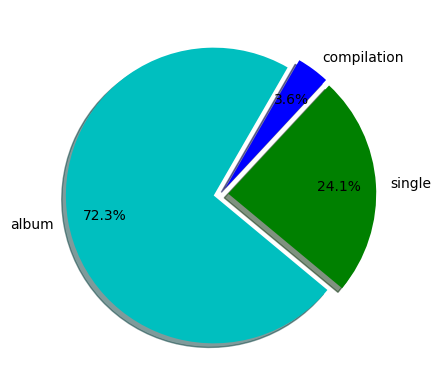

In [61]:
#Draw a pie chart
plt.pie(a_type,labels = a_type.index,autopct="%1.1f%%",startangle=60,
        colors='cgb',shadow='True',explode=(0.05,0.05,0.05),pctdistance=0.75)
plt.show()

5]how do the average likes,comments and views are compared between disserent album type?

In [63]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [70]:
df=data.groupby('Album_type')[['Likes','Comments','Views']].mean()
df


,Likes,Comments,Views
Album_type,,,
album,672593.609948,29032.951548,1.014359e+08
compilation,544275.818182,18074.903319,8.500535e+07
single,722266.303890,27313.048571,8.480843e+07


In [75]:
df=df.reset_index()
df

,index,Album_type,Likes,Comments,Views
0,0,album,672593.609948,29032.951548,1.014359e+08
1,1,compilation,544275.818182,18074.903319,8.500535e+07
2,2,single,722266.303890,27313.048571,8.480843e+07


In [78]:
#melt =unpivot a dataframe
df_melted=pd.melt(df, id_vars ='Album_type',var_name='Attribute',value_name='Total')
df_melted

,Album_type,Attribute,Total
0,album,index,0.000000e+00
1,compilation,index,1.000000e+00
2,single,index,2.000000e+00
3,album,Likes,6.725936e+05
4,compilation,Likes,5.442758e+05
5,single,Likes,7.222663e+05
6,album,Comments,2.903295e+04
7,compilation,Comments,1.807490e+04
8,single,Comments,2.731305e+04
9,album,Views,1.014359e+08


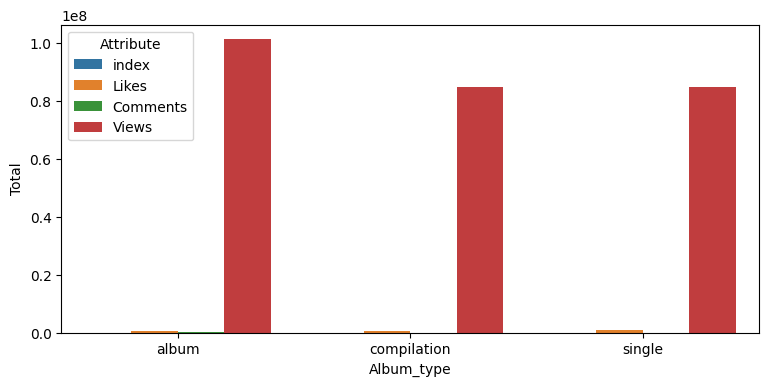

In [80]:
plt.figure(figsize=(9,4))

sns.barplot(x='Album_type',y="Total" ,hue="Attribute",data=df_melted);

6] Top 5 YT channels based on the views

In [82]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [98]:
c_views=data.groupby('Channel')['Views'].sum().sort_values(ascending=False).head(5)
c_views


,Views
Channel,
T-Series,4.796159e+10
LuisFonsiVEVO,2.170252e+10
CalvinHarrisVEVO,1.828114e+10
Macklemore,1.700341e+10
Ed Sheeran,1.691822e+10


In [102]:
c_views=c_views.reset_index()
c_views.head()

,Channel,Views
0,T-Series,4.796159e+10
1,LuisFonsiVEVO,2.170252e+10
2,CalvinHarrisVEVO,1.828114e+10
3,Macklemore,1.700341e+10
4,Ed Sheeran,1.691822e+10


In [103]:
type(c_views)

pandas.core.frame.DataFrame

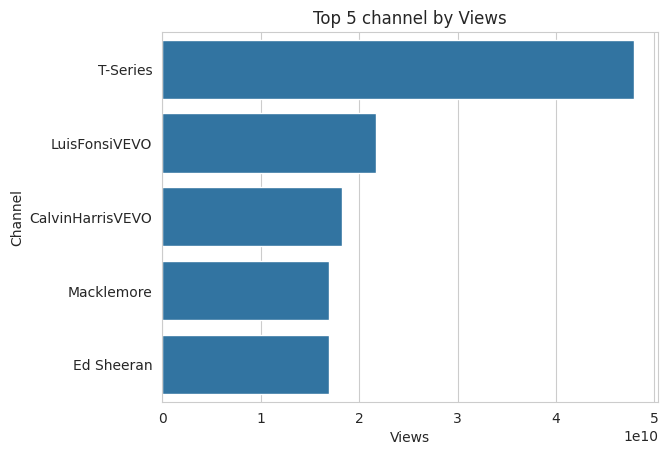

In [107]:
sns.barplot(x='Views',y='Channel',data=c_views)
plt.title('Top 5 channel by Views')
plt.xlabel('Views')
plt.ylabel('Channel')
plt.show()



7] top most track based on the views



In [108]:
data.sort_values(by='Views',ascending=False).head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1147,Luis Fonsi,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.153,0.198,...,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09


8]which top 7 tracks have highest like to view ratio on Youtue?

In [109]:
track_lv=data[['Track','Likes','Views']]
track_lv

,Track,Likes,Views
0,Feel Good Inc.,6220896.0,693555221.0
1,Rhinestone Eyes,1079128.0,72011645.0
2,New Gold (feat. Tame Impala and Bootie Brown),282142.0,8435055.0
3,On Melancholy Hill,1788577.0,211754952.0
4,Clint Eastwood,6197318.0,618480958.0
...,...,...,...
20713,JUST DANCE HARDSTYLE,1113.0,71678.0
20714,SET FIRE TO THE RAIN HARDSTYLE,2019.0,164741.0
20715,OUTSIDE HARDSTYLE SPED UP,329.0,35646.0
20716,ONLY GIRL HARDSTYLE,88.0,6533.0


In [110]:
track_lv['LV_Ratio']=data['Likes']/data['Views']*100

/tmp/ipython-input-1035498292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_lv['LV_Ratio']=data['Likes']/data['Views']*100


In [111]:
track_lv

,Track,Likes,Views,LV_Ratio
0,Feel Good Inc.,6220896.0,693555221.0,0.896958
1,Rhinestone Eyes,1079128.0,72011645.0,1.498547
2,New Gold (feat. Tame Impala and Bootie Brown),282142.0,8435055.0,3.344874
3,On Melancholy Hill,1788577.0,211754952.0,0.844645
4,Clint Eastwood,6197318.0,618480958.0,1.002022
...,...,...,...,...
20713,JUST DANCE HARDSTYLE,1113.0,71678.0,1.552778
20714,SET FIRE TO THE RAIN HARDSTYLE,2019.0,164741.0,1.225560
20715,OUTSIDE HARDSTYLE SPED UP,329.0,35646.0,0.922965
20716,ONLY GIRL HARDSTYLE,88.0,6533.0,1.347008


In [113]:
track_lv.sort_values(by='LV_Ratio',ascending=False).head(7)

,Track,Likes,Views,LV_Ratio
19968,Intro,237761.0,954081.0,24.920421
19969,Safety Zone,453910.0,1952637.0,23.246000
19967,Future,250116.0,1180522.0,21.186899
19971,Pandora's Box,253702.0,1265231.0,20.051832
16297,My Universe - Galantis Remix,371437.0,2067753.0,17.963316
15065,Burn It (feat. MAX),188244.0,1054438.0,17.852543
8105,No.2 (with parkjiyoon),346440.0,2050047.0,16.899125


In [115]:
#top 3 track having the low ike o view ration
track_lv.sort_values(by='LV_Ratio',ascending=True).head(3)

,Track,Likes,Views,LV_Ratio
15415,Whitehouse Road,0.0,53866517.0,0.0
13846,Womb Sound - Loopable with no fade,0.0,41.0,0.0
14348,From Liquid,0.0,770306.0,0.0


8]Top album having the tracks with maximum danceability

In [116]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [118]:
T_danceability=data.groupby('Album')['Danceability'].sum().sort_values(ascending=False)
T_danceability

,Danceability
Album,
Greatest Hits,17.356
Hamilton (Original Broadway Cast Recording),16.610
HEROES & VILLAINS,14.300
RODZINNY BIZNES,13.491
An Evening With Silk Sonic,13.349
...,...
Israeli Salad,0.000
"Hello, Dolly! (Remastered)",0.000
Relaxing Loopable White Noise,0.000


In [119]:
data[data.Album=='Greatest Hits']

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
220,2Pac,Hit 'Em Up - Single Version,Greatest Hits,compilation,0.916,0.844,7.0,-3.967,0.2360,0.0394,...,312627.0,2Pac - Hit 'Em Up (Dirty) (Music Video) HD,Seven Hip-Hop,585712131.0,4363164.0,208460.0,Music video by 2Pac performing Hit 'Em Up (Dir...,False,False,375955728.0
222,2Pac,California Love - Original Version,Greatest Hits,compilation,0.763,0.850,7.0,-3.052,0.0417,0.0304,...,284907.0,2Pac ft. Dr. Dre - California Love (Official V...,UPROXX Video,84654029.0,484619.0,12875.0,2Pac ft. Dr. Dre - California Love (Full Video...,False,False,497213287.0
225,2Pac,Changes,Greatest Hits,compilation,0.865,0.665,7.0,-6.289,0.0730,0.0453,...,268827.0,2pac - Changes Original Music Video,The Best,306542.0,4350.0,305.0,2pac - Changes Original Music Video,False,False,411056377.0
268,Fleetwood Mac,Gypsy,Greatest Hits,compilation,0.622,0.540,5.0,-13.990,0.0261,0.0170,...,264907.0,Fleetwood Mac - Gypsy (Official Music Video),Fleetwood Mac,81512369.0,436530.0,17764.0,You're watching the official music video for F...,True,True,213673856.0
1232,Bruce Springsteen,Streets of Philadelphia - Single Edit,Greatest Hits,compilation,0.741,0.290,5.0,-13.251,0.0302,0.2940,...,195080.0,Bruce Springsteen - Streets of Philadelphia (O...,BruceSpringsteenVEVO,171514802.0,669935.0,25407.0,"Official Video of ”Streets Of Philadelphia"" by...",True,True,239663934.0
1236,Bruce Springsteen,Secret Garden,Greatest Hits,compilation,0.520,0.329,0.0,-14.224,0.0266,0.5760,...,266613.0,"Bruce Springsteen Secret Garden HD, Jerry Magu...",VJ,25696359.0,104022.0,4674.0,My music video of Bruce Springsteen's beautifu...,False,False,69059523.0
1862,Shania Twain,From This Moment On - Pop On-Tour Version,Greatest Hits,compilation,0.460,0.505,9.0,-5.487,0.0266,0.4200,...,235107.0,From This Moment On (Pop On-Tour Version),Shania Twain - Topic,2629831.0,30669.0,65.0,Provided to YouTube by Universal Music Group\n...,True,True,84623227.0
2164,Wyclef Jean,Killing Me Softly With His Song,Greatest Hits,compilation,0.765,0.437,4.0,-10.122,0.0727,0.0271,...,290293.0,Fugees - Killing Me Softly With His Song (Offi...,TheFugeesVEVO,351401822.0,2549466.0,42859.0,"""Killing Me Softly With His Song"" by Fugees\n\...",True,True,518080621.0
3079,Tracy Chapman,Stand by Me - Live at the Late Show with David...,Greatest Hits,compilation,0.816,0.144,7.0,-10.148,0.0398,0.7970,...,169013.0,Tracy Chapman - Stand by Me (Live on Letterman...,Tracy Chapman Online,16971605.0,134753.0,0.0,♥ Subscribe our newsletter ► https://www.about...,False,False,44060055.0
3097,Blondie,Maria,Greatest Hits,compilation,0.548,0.800,9.0,-6.926,0.0597,0.0380,...,249427.0,Maria - Blondie,Paola1311,70126379.0,263063.0,9124.0,"Blondie, Maria",False,False,90857487.0


9]what is the correleation between likes,comments and streams

In [120]:
df_vlcs=data[['Views','Likes','Comments','Stream']]
df_vlcs

,Views,Likes,Comments,Stream
0,693555221.0,6220896.0,169907.0,1.040235e+09
1,72011645.0,1079128.0,31003.0,3.100837e+08
2,8435055.0,282142.0,7399.0,6.306347e+07
3,211754952.0,1788577.0,55229.0,4.346636e+08
4,618480958.0,6197318.0,155930.0,6.172597e+08
...,...,...,...,...
20713,71678.0,1113.0,0.0,9.227144e+06
20714,164741.0,2019.0,0.0,1.089818e+07
20715,35646.0,329.0,0.0,6.226110e+06
20716,6533.0,88.0,0.0,6.873961e+06


In [121]:
df_vlcs.corr()

,Views,Likes,Comments,Stream
Views,1.000000,0.891695,0.431077,0.603510
Likes,0.891695,1.000000,0.631035,0.655808
Comments,0.431077,0.631035,1.000000,0.267833
Stream,0.603510,0.655808,0.267833,1.000000


<Axes: >

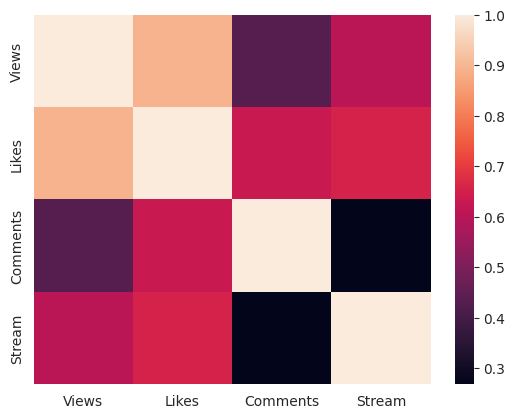

In [122]:
sns.heatmap(df_vlcs.corr())